In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf

In [2]:
df = pd.read_csv('HAM10000_metadata_kaggle.csv')
df['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

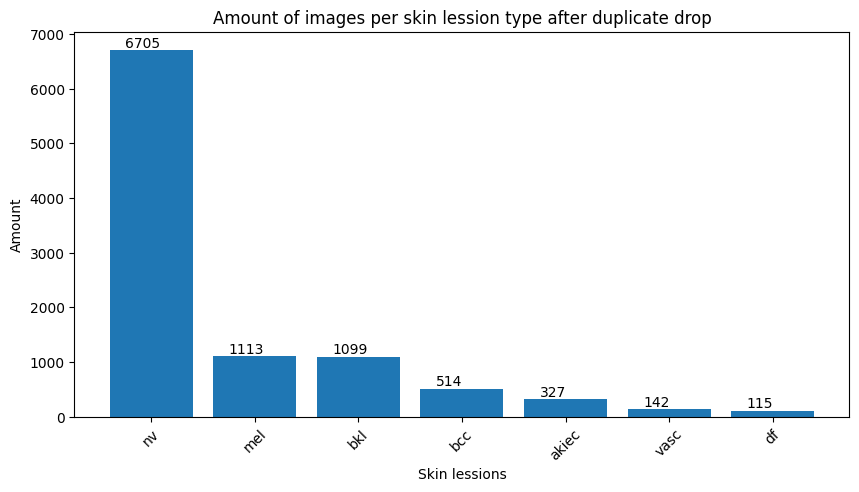

In [3]:
plt.figure(figsize=(10,5))
plt.bar(df['dx'].value_counts().index, df['dx'].value_counts())
plt.xticks(rotation=45)
plt.xlabel('Skin lessions')
plt.ylabel('Amount')
plt.title('Amount of images per skin lession type after duplicate drop')
for i, v in enumerate(df['dx'].value_counts()):
    plt.text(i-.25, v+50, str(v))
plt.show()

In [14]:
original_counts = df['dx'].value_counts()
unique_counts = df.drop_duplicates(subset='lesion_id', keep="first")['dx'].value_counts()

In [15]:
unique_counts.values

array([5403,  727,  614,  327,  228,   98,   73], dtype=int64)

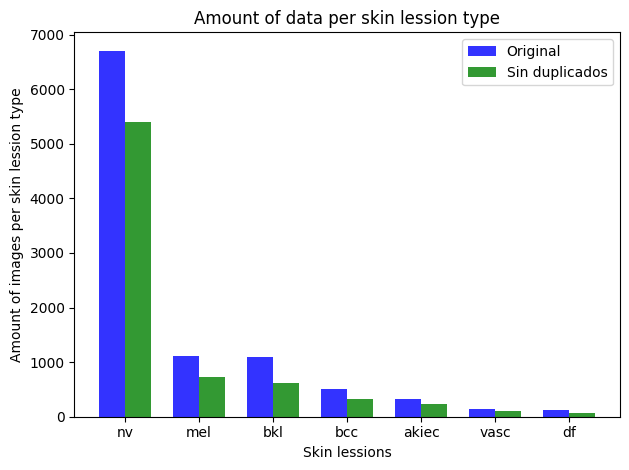

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la cantidad original de datos por clase
original_counts = df['dx'].value_counts()

# Obtener la cantidad de datos sin duplicados por clase
unique_counts = df.drop_duplicates(subset='lesion_id', keep='first')['dx'].value_counts()

# Crear una figura y un eje
fig, ax = plt.subplots()

# Configurar las barras para la cantidad original de datos
bar_width = 0.35
opacity = 0.8
index = np.arange(len(original_counts))
rects1 = ax.bar(index, original_counts.values, bar_width, alpha=opacity, color='b', label='Original')

# Configurar las barras para la cantidad de datos sin duplicados
rects2 = ax.bar(index + bar_width, unique_counts.values, bar_width, alpha=opacity, color='g', label='Whitout duplicates')

# Configurar ejes, etiquetas y leyendas
ax.set_xlabel('Skin lessions')
ax.set_ylabel('Amount of images per skin lession type')
ax.set_title('Amount of data per skin lession type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(original_counts.index)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# find duplicates by lesion_id whitout adding a new column to the dataset 

df.duplicated(subset='lesion_id', keep='first').value_counts()
df_duplicated = df[df.duplicated(subset='lesion_id', keep='first')]
# df['duplicates'] = df.duplicated(subset='lesion_id', keep='first')
df_duplicated['dx'].value_counts()
# count the amount of dx types in the duplicated dataset




In [ ]:
# discard the duplicate images by lesion_id from the dataset and keep the first one found 

df = df.drop_duplicates(subset='lesion_id', keep="first")
df['dx'].value_counts()

In [ ]:
# Plot the amount of images per dx type with the amount on top of the bar 

plt.figure(figsize=(10,5))
plt.bar(df['dx'].value_counts().index, df['dx'].value_counts())
plt.xticks(rotation=45)
plt.xlabel('Skin lessions')
plt.ylabel('Amount')
plt.title('Amount of images per skin lession type after duplicate drop')
for i, v in enumerate(df['dx'].value_counts()):
    plt.text(i-.25, v+50, str(v))
plt.show()


In [ ]:
df.info()

In [ ]:
# drop null values from the dataset

df = df.dropna()
df.info()

In [ ]:
df['dx'].value_counts()

# Create a new column with the path of the images from the directory
df['path'] = df['image_id'].map(lambda x: os.path.join('ISIC2018_Task3_TestImages', x + '.jpg'))
df.head()

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

In [ ]:
# Give me the code to drop lesion_id, age, sex, localization columns from the dataset 
# because they are not useful for the classification task
df.info()


In [ ]:
# Drop the columns that are not useful for the classification task
df = df.drop(['lesion_id', 'age', 'sex', 'localization','dx_type'], axis=1)
df.head()

In [ ]:
df.reset_index(inplace=True, drop=True)
df.head()

In [ ]:
# Create new columns for each unique value in the 'dx' column
dx_dummies = pd.get_dummies(df['dx'])

# Add the new columns to the original DataFrame
df = pd.concat([df, dx_dummies], axis=1)

# Drop the original 'dx' column
df = df.drop('dx', axis=1)
df = df.replace({False: 0, True: 1})

In [ ]:
df.head()

In [ ]:
# Make the column names uppercase except for the 'image_id' column 
df.columns = [col.upper() if col != 'image_id' else col for col in df.columns]

# Replace the column with the name 'image_id' with the name 'image'
df = df.rename(columns={'image_id': 'image'})

df.head()

In [ ]:
# Save the DataFrame as a CSV file in the same folder
# df.to_csv('ISIC2018_Task3_Training_GroundTruth.csv', index=False, mode='w')

In [ ]:
# Using matplotlib, plot a bar chart with the number of images for each class

# Get the class labels
class_labels = df.columns[1:]

# Count the number of images in each class

class_counts = {}
for label in class_labels:
    class_counts[label] = len(df[df[label] == 1])

print(class_counts)

# Plot a bar chart
plt.figure(figsize=(4, 2))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Number of images for each class')
plt.xlabel('Skin lesion type')
plt.ylabel('Number of images')
plt.show()




In [ ]:
df.value_counts